<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
#Импорт библиотек и фиксирование random_state
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
p_random_state=12345

In [2]:
#Загрузка данных
data= pd.read_csv('.../insurance.csv')
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
data.duplicated().sum()

153

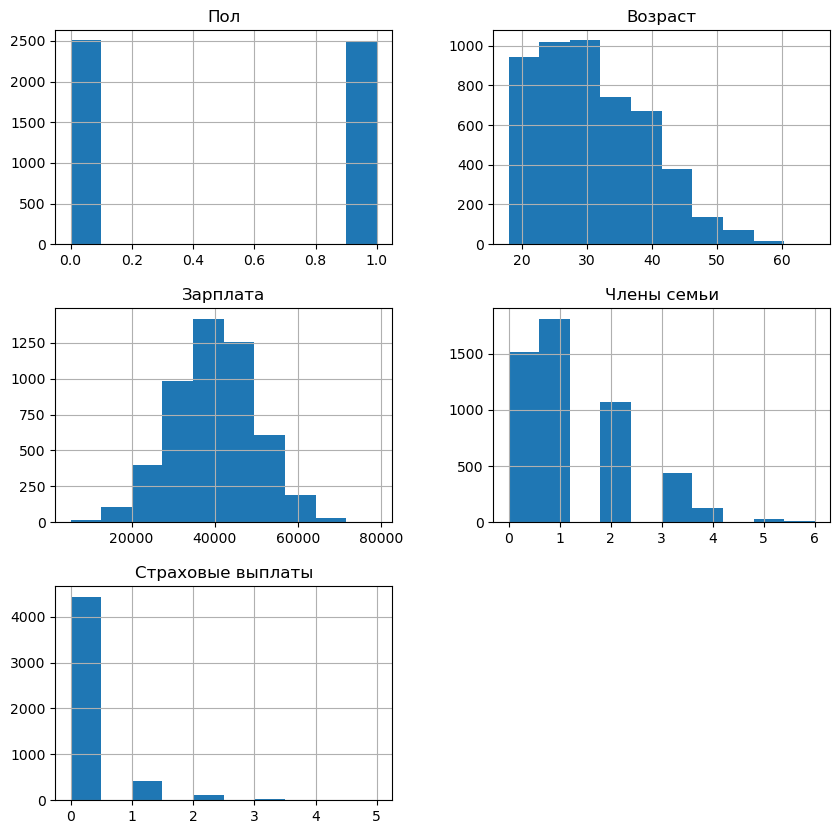

In [6]:
data.hist(figsize=(10, 10), legend=False)
plt.show()

По представленным данным видим:
- таблица состоит из 5 колонок: 4 описательных признака и 1 целевой признак
- пропусков в таблице нет
- типы данных в целом соответствуют содержащимся данным (возраст можно преобразовать в int)
- в данных есть 153 дубликата (это меньше 0.5%), но удалять их нельзя, т.к. данные в целом неуникальны - разные застрахованные могут совпадать по полу, возрасту, уровню дохода и т.д.
- по гистограммам видим распределение признаков: средний возраст застрахованных - от 20 до 30лет (среднее - 30.9), медиана по зарплате - около 40тыс., количество членов семьи - наиболее часто 0 или 1.
- среднее по страховым выплатам - 0,148, то есть в среднем за 5 лет приходится 1 выплата на 6-7 застрахованных. (1/0.148 = 6.75). По бОльшей доле застрахованных (свыше 4 тыс человек из 5 тыс) за последние 5 лет не было ни одной выплаты.


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится, так как предсказания останутся идентичными.

**Обоснование:** 
Шаг 1. Рассмотрим, как изменится вектор весов w после умножения на матрицу P:

<br>
$$
w' = ((XP)^T (XP))^{-1} (XP)^T y = (P^T X^T X P)^{-1} P^T X^T y = (X^T X P)^{-1} (P^T)^{-1} P^T X^T y = (X^T X P)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

Шаг 2. Рассмотрим как изменятся предсказания:
- было до умножения
$$
a = Xw
$$
- стало после умножения (подставим вместо X - X*P, вместо w' - P^(-1)*w):

$$
a' = XP w' = X P P^{-1} w = X E w  = Xw
$$
Таким образом, и до умножения, и после умножения предсказания равны Xw, это означает, что результат не изменится.

## Алгоритм преобразования

**Алгоритм**

1. Взять случайную обратимую матрицу P размерностью n*n, где n - количество признаков. Проверить, что матрица обратимая.
2. Преобразовать матрицу признаков обучающей выборки (Х), умножив ее на P (назовем ее XP)
3. Разработать класс LinearRegression, который будет обучать модель и предсказывать результаты. Создавать отдельный класс для зашифрованных данных нет необходимости, так как при шифровании меняться будут только подаваемые на вход параметры, а алгоритм остается тот же.
4. Обучить модель (modelP) на преобразованной матрице признаков XP (целевой признак оставляем как есть).
5. Получить предсказания по модели - сохраним их в predictionsP
6. Вычислить меру R2 - сохраним меру в r2P

<br>Для проверки корректности:

7. Обучить модель (model) на исходной матрице признаков(X)
8. Получить предсказания модели - сохраним их в predictions и сравним со значением predictionsP
10. Вычислим меру R2 - сохраним ее в r2 и сравним со значением r2P
11. Сделаем вывод о качестве регрессии с применением шифрования и без.

**Обоснование**

Как было доказано в п.2, если исходная матрица признаков умножается на обратимую матрицу P, то изменяются веса линейной регрессии, но не меняется качество предсказания по модели. 
При создании класса LinearRegression в методе fit,подавая на вход разные матрицы (незашифрованную и зашифрованную), мы получим разные веса.
Однако, при предсказании в методе predict мы подаем на вход также зашифрованную и незашифрованную матрицы.
После шифрования в методе predict зашифрованная матрица XP умножается на веса, рассчитанные также по зашифрованной матрице (w'= P^{-1}w). В результате чего умножение P и P^{-1} дает единичную матрицу. По формуле ниже мы видим, что предсказания при этом должны получиться идентичны тем, что мы бы получили на данных без шифрования.
$$
a' = XP w' = X P P^{-1} w = X E w = Xw
$$

Таким образом, можно обучить модель на зашифрованных с помощью обратимой матрицы Р данных и применять данную модель для прогнозирования результатов.

## Проверка алгоритма

In [7]:
#1.Создадим случайную матрицу P размерностью 4х4
rng = np.random.default_rng(seed=p_random_state)
P = rng.random((4, 4))
P

array([[0.22733602, 0.31675834, 0.79736546, 0.67625467],
       [0.39110955, 0.33281393, 0.59830875, 0.18673419],
       [0.67275604, 0.94180287, 0.24824571, 0.94888115],
       [0.66723745, 0.09589794, 0.44183967, 0.88647992]])

In [8]:
#Проверим, что матрица P обратимая
Pinv = np.linalg.inv(P)
Pinv

array([[-1.97240014,  1.76004024, -0.08309671,  1.22285233],
       [ 0.14111106,  0.32873452,  1.02824721, -1.27752175],
       [ 0.8908452 ,  0.90302415, -0.59501472, -0.23290483],
       [ 1.02530945, -1.81039816,  0.24787878,  0.46192295]])

In [9]:
#Определим фичи и таргет
X = np.array(data.drop('Страховые выплаты', axis=1))
y = np.array(data['Страховые выплаты'])
print(X)
print(y)

[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 ...
 [0.00e+00 2.00e+01 3.39e+04 2.00e+00]
 [1.00e+00 2.20e+01 3.27e+04 3.00e+00]
 [1.00e+00 2.80e+01 4.06e+04 1.00e+00]]
[0 1 0 ... 0 0 0]


In [10]:
#2.Преобразуем матрицу признаков обучающей выборки (Х), умножив ее на P (назовем ее XP)
XP = X.dot(P)
XP

array([[33385.62984818, 46727.48014471, 12338.75730965, 47073.72396713],
       [25583.38794934, 35803.91421888,  9461.30119825, 36066.96002212],
       [14139.21910127, 19787.51177458,  5230.51096108, 19931.91947988],
       ...,
       [22815.58655801, 31933.96520708,  8428.37958035, 32172.5786907 ],
       [22009.95609777, 30804.88005289,  8132.92054542, 31035.85751146],
       [27325.74102789, 38246.92777622, 10096.76786418, 38531.36605622]])

In [11]:
print(XP.shape)
print(np.linalg.inv(XP.T.dot(XP)))
m1=XP.T.dot(XP)
print(m1.shape)

(5000, 4)
[[ 3.34594430e-03 -4.85083831e-04 -1.42822712e-03 -1.51714885e-03]
 [-4.85083923e-04  2.82743558e-04  1.58866627e-04  2.17290793e-05]
 [-1.42822710e-03  1.58866584e-04  6.25545348e-04  6.91270305e-04]
 [-1.51714876e-03  2.17290251e-05  6.91270277e-04  8.73235950e-04]]
(4, 4)


Видим, что признаки в матрице Х теперь зашифрованы и неинтерпретируемы.

In [12]:
#3.Разработаем класс LinearRegression для обучения и предсказания
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [13]:
#4.Обучим модель (modelP) на преобразованной матрице признаков XP (целевой признак оставляем как есть).
modelP = LinearRegression()
modelP.fit(XP, y)
predictionsP = modelP.predict(XP )
print('Пример первых 5 предсказаний:',predictionsP[:5]) #посмотрим часть предсказаний
r2P = r2_score(y, predictionsP) #посчитаем меру R2
print('Мера R2 на данных с шифрованием:',r2P)

Пример первых 5 предсказаний: [ 0.51172749  0.68431614  0.09373389 -0.22258844  0.06508396]
Мера R2 на данных с шифрованием: 0.4249455028661825


**Сравним полученные результаты с результатами без шифрования:**

In [14]:
#7.Обучим модель (model) на исходной матрице признаков X (целевой признак оставляем как есть).
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print('Пример первых 5 предсказаний:',predictions[:5]) #посмотрим часть предсказаний
r2 = r2_score(y, predictions) #посчитаем меру R2
print('Мера R2 на данных с шифрованием:', r2)

Пример первых 5 предсказаний: [ 0.51172715  0.68431581  0.09373365 -0.22258878  0.06508374]
Мера R2 на данных с шифрованием: 0.4249455028666801


Видим, что данные действительно получились идентичные. Таким образом, чтобы защитить персональные данные клиентов, можно перед обучением модели линейной регрессии умножать их на обратимую матрицу.